# Exploratory Data Analysis - NBA Fantasy Points Prediction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
season_22_23 = pd.read_csv('../data/processed/Season(2022-23)_cleaned.csv')
season_23_24 = pd.read_csv('../data/processed/Season(2023-24)_cleaned.csv')

In [14]:
print(season_22_23.columns)
print(season_23_24.columns)

Index(['Date', 'Name', 'Team', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'GmSc', '+-', 'TeamAbbr', 'GameLink', 'Opponent', 'Home',
       'GameType', 'id', 'fpts_fanduel'],
      dtype='object')
Index(['Date', 'Name', 'Team', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'GmSc', '+-', 'TeamAbbr', 'GameLink', 'Opponent', 'Home',
       'GameType', 'id', 'fpts_fanduel'],
      dtype='object')


In [10]:
print(season_22_23.isnull().sum())
print(season_23_24.isnull().sum())

Date            0
Name            0
Team            0
MP              0
FG              0
FGA             0
FG%             0
3P              0
3PA             0
3P%             0
FT              0
FTA             0
FT%             0
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
GmSc            0
+-              0
TeamAbbr        0
GameLink        0
Opponent        0
Home            0
GameType        0
id              0
fpts_fanduel    0
dtype: int64
Date            0
Name            0
Team            0
MP              0
FG              0
FGA             0
FG%             0
3P              0
3PA             0
3P%             0
FT              0
FTA             0
FT%             0
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
GmSc            0
+-             

In [18]:
pd.to_datetime(season_22_23['Date'])


0       2022-10-18
1       2022-10-18
2       2022-10-18
3       2022-10-18
4       2022-10-18
           ...    
27734   2023-06-12
27735   2023-06-12
27736   2023-06-12
27737   2023-06-12
27738   2023-06-12
Name: Date, Length: 27739, dtype: datetime64[ns]

In [19]:
pd.to_datetime(season_23_24['Date'])

0       2023-10-24
1       2023-10-24
2       2023-10-24
3       2023-10-24
4       2023-10-24
           ...    
28226   2024-06-17
28227   2024-06-17
28228   2024-06-17
28229   2024-06-17
28230   2024-06-17
Name: Date, Length: 28231, dtype: datetime64[ns]

In [20]:
print(season_22_23.dtypes)
print(season_23_24.dtypes)

Date             object
Name             object
Team             object
MP               object
FG                int64
FGA               int64
FG%             float64
3P                int64
3PA               int64
3P%             float64
FT                int64
FTA               int64
FT%             float64
ORB               int64
DRB               int64
TRB               int64
AST               int64
STL               int64
BLK               int64
TOV               int64
PF                int64
PTS               int64
GmSc            float64
+-                int64
TeamAbbr         object
GameLink         object
Opponent         object
Home              int64
GameType         object
id                int64
fpts_fanduel    float64
dtype: object
Date             object
Name             object
Team             object
MP               object
FG                int64
FGA               int64
FG%             float64
3P                int64
3PA               int64
3P%             float64
FT

In [21]:
season_22_23.head(20)

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,...,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel
0,2022-10-18,tyrese maxey,Philadelphia 76ers,38:11,8,16,0.500,2,5,0.400,...,21,13.7,-6,PHI,https://www.basketball-reference.com/boxscores...,Boston Celtics,0,Season,20002546,30.2
1,2022-10-18,james harden,Philadelphia 76ers,37:17,9,14,0.643,5,9,0.556,...,35,31.9,1,PHI,https://www.basketball-reference.com/boxscores...,Boston Celtics,0,Season,20000544,52.1
2,2022-10-18,joel embiid,Philadelphia 76ers,37:16,9,18,0.500,1,6,0.167,...,26,17.7,-13,PHI,https://www.basketball-reference.com/boxscores...,Boston Celtics,0,Season,20000726,48.5
3,2022-10-18,tobias harris,Philadelphia 76ers,34:14,7,14,0.500,3,6,0.500,...,18,13.4,-1,PHI,https://www.basketball-reference.com/boxscores...,Boston Celtics,0,Season,20000676,29.4
4,2022-10-18,p.j. tucker,Philadelphia 76ers,33:01,3,5,0.600,0,2,0.000,...,6,3.6,-6,PHI,https://www.basketball-reference.com/boxscores...,Boston Celtics,0,Season,20000856,11.8
5,2022-10-18,de'anthony melton,Philadelphia 76ers,20:33,2,4,0.500,1,2,0.500,...,5,3.2,-13,PHI,https://www.basketball-reference.com/boxscores...,Boston Celtics,0,Season,20002029,8.0
6,2022-10-18,danuel house jr.,Philadelphia 76ers,16:12,0,2,0.000,0,1,0.000,...,1,0.4,-5,PHI,https://www.basketball-reference.com/boxscores...,Boston Celtics,0,Season,20001747,8.7
7,2022-10-18,georges niang,Philadelphia 76ers,12:09,1,4,0.250,1,3,0.333,...,3,0.9,-5,PHI,https://www.basketball-reference.com/boxscores...,Boston Celtics,0,Season,20001708,4.5
8,2022-10-18,montrezl harrell,Philadelphia 76ers,10:44,1,3,0.333,0,0,0.000,...,2,-1.2,4,PHI,https://www.basketball-reference.com/boxscores...,Boston Celtics,0,Season,20001447,4.0
9,2022-10-18,matisse thybulle,Philadelphia 76ers,0:23,0,0,0.000,0,0,0.000,...,0,0.0,-1,PHI,https://www.basketball-reference.com/boxscores...,Boston Celtics,0,Season,20002288,0.0


In [22]:
season_22_23.tail(10)

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,...,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel
27729,2023-06-12,cody zeller,Miami Heat,1:01,0,1,0.000,0,0,0.000,...,0,0.0,-5,MIA,https://www.basketball-reference.com/boxscores...,Denver Nuggets,0,Finals,20000754,1.2
27730,2023-06-12,nikola jokic,Denver Nuggets,42:18,12,16,0.750,1,3,0.333,...,28,24.3,12,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,20001441,52.2
27731,2023-06-12,jamal murray,Denver Nuggets,41:15,6,15,0.400,2,7,0.286,...,14,8.1,12,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,20001666,32.6
27732,2023-06-12,kentavious caldwell-pope,Denver Nuggets,34:00,4,10,0.400,1,5,0.200,...,11,11.3,7,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,20000811,32.8
27733,2023-06-12,michael porter jr.,Denver Nuggets,33:37,7,17,0.412,1,6,0.167,...,16,12.3,-7,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,20001988,35.1
27734,2023-06-12,aaron gordon,Denver Nuggets,28:39,1,6,0.167,0,2,0.000,...,4,3.1,8,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,20000681,21.9
27735,2023-06-12,bruce brown,Denver Nuggets,28:09,4,14,0.286,0,5,0.000,...,10,4.7,0,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,20002040,20.7
27736,2023-06-12,christian braun,Denver Nuggets,24:17,2,4,0.500,0,0,0.000,...,7,6.5,0,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,20002868,15.1
27737,2023-06-12,jeff green,Denver Nuggets,4:44,2,2,1.000,0,0,0.000,...,4,3.3,-5,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,20000632,5.5
27738,2023-06-12,deandre jordan,Denver Nuggets,3:01,0,0,0.000,0,0,0.000,...,0,0.7,-2,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,20000663,3.0


In [23]:
season_23_24.head(20)

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,...,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel
0,2023-10-24,d'angelo russell,Los Angeles Lakers,36:11,4,12,0.333,2,5,0.400,...,11,6.7,1,LAL,https://www.basketball-reference.com/boxscores...,Denver Nuggets,0,Season,20001458,26.3
1,2023-10-24,anthony davis,Los Angeles Lakers,34:09,6,17,0.353,1,2,0.500,...,17,11.3,-17,LAL,https://www.basketball-reference.com/boxscores...,Denver Nuggets,0,Season,20000468,36.6
2,2023-10-24,austin reaves,Los Angeles Lakers,31:20,4,11,0.364,1,2,0.500,...,14,13.1,-14,LAL,https://www.basketball-reference.com/boxscores...,Denver Nuggets,0,Season,20002720,33.6
3,2023-10-24,taurean prince,Los Angeles Lakers,29:53,6,8,0.750,4,6,0.667,...,18,16.5,-14,LAL,https://www.basketball-reference.com/boxscores...,Denver Nuggets,0,Season,20001680,25.1
4,2023-10-24,lebron james,Los Angeles Lakers,29:00,10,16,0.625,1,4,0.250,...,21,20.3,7,LAL,https://www.basketball-reference.com/boxscores...,Denver Nuggets,0,Season,20000571,41.1
5,2023-10-24,gabe vincent,Los Angeles Lakers,22:18,3,8,0.375,0,4,0.000,...,6,1.5,-17,LAL,https://www.basketball-reference.com/boxscores...,Denver Nuggets,0,Season,20002254,11.2
6,2023-10-24,cam reddish,Los Angeles Lakers,17:38,2,4,0.500,1,2,0.500,...,7,6.9,7,LAL,https://www.basketball-reference.com/boxscores...,Denver Nuggets,0,Season,20002276,14.8
7,2023-10-24,christian wood,Los Angeles Lakers,15:28,3,4,0.750,0,1,0.000,...,7,5.2,2,LAL,https://www.basketball-reference.com/boxscores...,Denver Nuggets,0,Season,20001527,10.8
8,2023-10-24,rui hachimura,Los Angeles Lakers,14:39,3,10,0.300,0,3,0.000,...,6,1.1,-8,LAL,https://www.basketball-reference.com/boxscores...,Denver Nuggets,0,Season,20002275,9.6
9,2023-10-24,jaxson hayes,Los Angeles Lakers,6:54,0,0,0.000,0,0,0.000,...,0,-0.1,-7,LAL,https://www.basketball-reference.com/boxscores...,Denver Nuggets,0,Season,20002274,1.2


In [24]:
season_23_24.tail(10)

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,...,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel
28221,2024-06-17,jaylen brown,Boston Celtics,44:15,7,23,0.304,2,9,0.222,...,21,13.3,20,BOS,https://www.basketball-reference.com/boxscores...,Dallas Mavericks,1,Finals,20001672,44.6
28222,2024-06-17,jrue holiday,Boston Celtics,43:09,7,14,0.500,1,3,0.333,...,15,13.2,21,BOS,https://www.basketball-reference.com/boxscores...,Dallas Mavericks,1,Finals,20000474,35.2
28223,2024-06-17,derrick white,Boston Celtics,38:09,4,10,0.400,4,8,0.500,...,14,14.0,1,BOS,https://www.basketball-reference.com/boxscores...,Dallas Mavericks,1,Finals,20001856,32.1
28224,2024-06-17,al horford,Boston Celtics,31:35,3,6,0.500,2,3,0.667,...,9,11.3,20,BOS,https://www.basketball-reference.com/boxscores...,Dallas Mavericks,1,Finals,20000603,28.8
28225,2024-06-17,sam hauser,Boston Celtics,17:07,3,7,0.429,2,6,0.333,...,8,8.0,3,BOS,https://www.basketball-reference.com/boxscores...,Dallas Mavericks,1,Finals,20002686,17.3
28226,2024-06-17,kristaps porzingis,Boston Celtics,16:05,2,4,0.500,0,2,0.000,...,5,2.1,8,BOS,https://www.basketball-reference.com/boxscores...,Dallas Mavericks,1,Finals,20001406,6.2
28227,2024-06-17,luke kornet,Boston Celtics,2:02,0,0,0.000,0,0,0.000,...,0,0.7,-2,BOS,https://www.basketball-reference.com/boxscores...,Dallas Mavericks,1,Finals,20001889,1.2
28228,2024-06-17,payton pritchard,Boston Celtics,1:25,1,1,1.000,1,1,1.000,...,3,2.7,1,BOS,https://www.basketball-reference.com/boxscores...,Dallas Mavericks,1,Finals,20002551,3.0
28229,2024-06-17,oshae brissett,Boston Celtics,0:38,0,0,0.000,0,0,0.000,...,0,0.0,0,BOS,https://www.basketball-reference.com/boxscores...,Dallas Mavericks,1,Finals,20002356,0.0
28230,2024-06-17,svi mykhailiuk,Boston Celtics,0:38,0,0,0.000,0,0,0.000,...,0,0.3,0,BOS,https://www.basketball-reference.com/boxscores...,Dallas Mavericks,1,Finals,20002035,1.2


In [25]:
season_22_23.drop_duplicates(inplace=True)
season_23_24.drop_duplicates(inplace=True)

## EDA

In [26]:
print(season_22_23.shape)
print(season_23_24.shape)

(27739, 31)
(28231, 31)


In [38]:
pd.set_option('display.max_colwidth', None)
season_22_23.loc[season_22_23['fpts_fanduel'].idxmax()].to_frame()

,10920
Date,2022-12-27
Name,luka doncic
Team,Dallas Mavericks
MP,47:09
FG,21
FGA,31
FG%,0.677
3P,2
3PA,6
3P%,0.333


In [32]:
season_22_23.loc[season_22_23['fpts_fanduel'].idxmin()].to_frame()

,2970
Date,2022-11-05
Name,aaron wiggins
Team,Oklahoma City Thunder
MP,8:41
FG,0
FGA,0
FG%,0.0
3P,0
3PA,0
3P%,0.0


In [33]:
season_23_24.loc[season_23_24['fpts_fanduel'].idxmax()].to_frame()

,13727
Date,2024-01-22
Name,joel embiid
Team,Philadelphia 76ers
MP,36:38
FG,24
FGA,41
FG%,0.585
3P,1
3PA,2
3P%,0.5


In [34]:
season_23_24.loc[season_23_24['fpts_fanduel'].idxmin()].to_frame()

,6759
Date,2023-12-08
Name,duncan robinson
Team,Miami Heat
MP,23:12
FG,0
FGA,7
FG%,0.0
3P,0
3PA,6
3P%,0.0


In [37]:
print(season_22_23.isnull().any().to_frame().T)
print(season_23_24.isnull().any().to_frame().T)

    Date   Name   Team     MP     FG    FGA    FG%     3P    3PA    3P%  ...  \
0  False  False  False  False  False  False  False  False  False  False  ...   

     PTS   GmSc     +-  TeamAbbr  GameLink  Opponent   Home  GameType     id  \
0  False  False  False     False     False     False  False     False  False   

   fpts_fanduel  
0         False  

[1 rows x 31 columns]
    Date   Name   Team     MP     FG    FGA    FG%     3P    3PA    3P%  ...  \
0  False  False  False  False  False  False  False  False  False  False  ...   

     PTS   GmSc     +-  TeamAbbr  GameLink  Opponent   Home  GameType     id  \
0  False  False  False     False     False     False  False     False  False   

   fpts_fanduel  
0         False  

[1 rows x 31 columns]


In [39]:
season_22_23[season_22_23.duplicated()]

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,...,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel


In [40]:
season_23_24[season_23_24.duplicated()]

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,...,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel


## Visualize Data

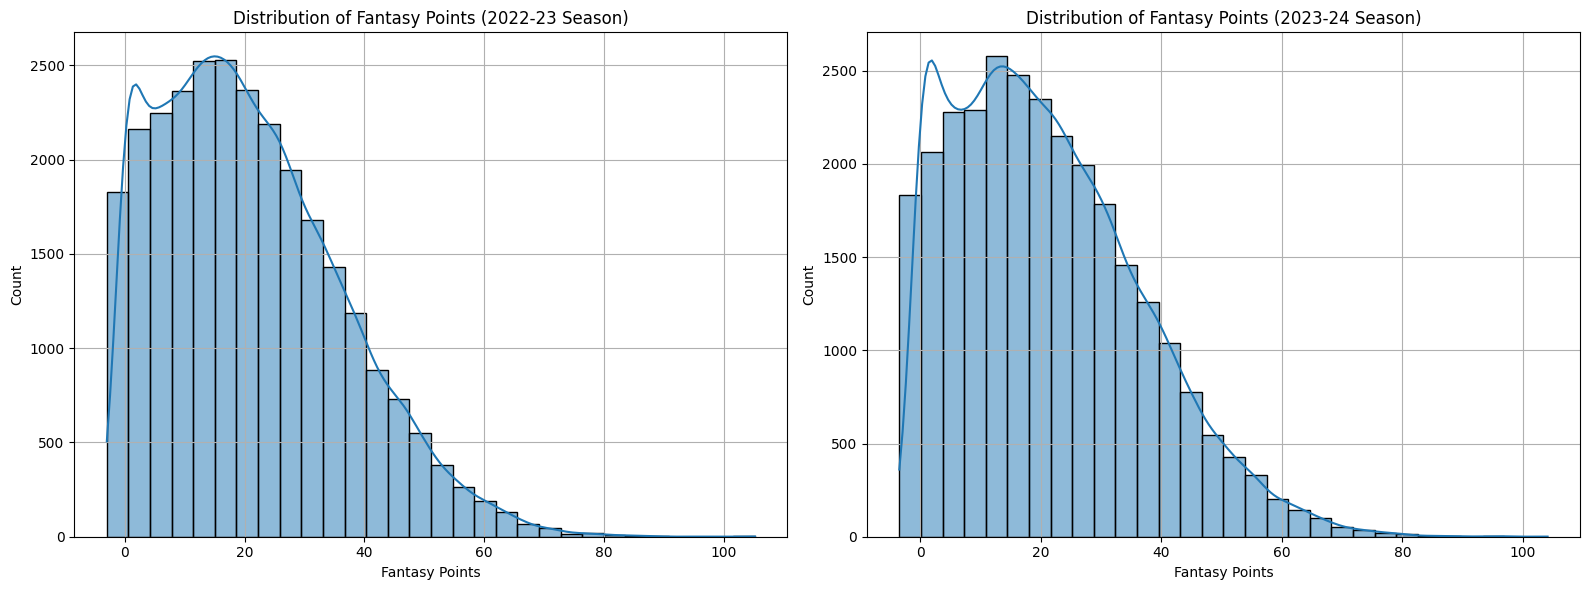

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(season_22_23['fpts_fanduel'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Distribution of Fantasy Points (2022-23 Season)')
axes[0].set_xlabel('Fantasy Points')
axes[0].set_ylabel('Count')
axes[0].grid(True)

sns.histplot(season_23_24['fpts_fanduel'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Distribution of Fantasy Points (2023-24 Season)')
axes[1].set_xlabel('Fantasy Points')
axes[1].set_ylabel('Count')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [44]:
print(season_22_23['fpts_fanduel'].describe())
print('\n',season_23_24['fpts_fanduel'].describe())

count    27739.000000
mean        21.066520
std         15.237915
min         -3.000000
25%          9.000000
50%         19.000000
75%         30.800000
max        105.200000
Name: fpts_fanduel, dtype: float64

 count    28231.000000
mean        21.106688
std         15.506377
min         -3.500000
25%          8.700000
50%         18.900000
75%         31.100000
max        104.100000
Name: fpts_fanduel, dtype: float64


In [48]:
print(f"Skewness 22-23: {season_22_23['fpts_fanduel'].skew()}")
print(f"Kurtosis 22-23: {season_22_23['fpts_fanduel'].kurt()}")
print('-' * 50)
print(f"Skewness 23-24: {season_23_24['fpts_fanduel'].skew()}")
print(f"Kurtosis 23-24: {season_23_24['fpts_fanduel'].kurt()}")


Skewness 22-23: 0.7018702835704467
Kurtosis 22-23: 0.16391280377985185
--------------------------------------------------
Skewness 23-24: 0.7100793297888167
Kurtosis 23-24: 0.16180244326888182


## Clean Datasets

In [152]:
# season_22_23 = pd.read_csv('../data/processed/Season(2022-23).csv')
# season_23_24 = pd.read_csv('../data/processed/Season(2023-24).csv')
# print(season_22_23.tail())
# print(season_23_24.tail())

           Date            Name            Team   MP   FG  FGA  FG%   3P  3PA  3P%   FT  FTA  FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  PTS GmSc   +- TeamAbbr                                                          GameLink    Opponent  Home GameType  id  fpts_fanduel
33601  20230612   vlatko cancar  Denver Nuggets  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP      DEN  https://www.basketball-reference.com/boxscores/202306120DEN.html  Miami Heat     1   Finals  -1           0.0
33602  20230612  reggie jackson  Denver Nuggets  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP      DEN  https://www.basketball-reference.com/boxscores/202306120DEN.html  Miami Heat     1   Finals  -1           0.0
33603  20230612      zeke nnaji  Denver Nuggets  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP      DEN  https://www.basket

In [153]:
# def fix_data_types(df):
#     # Define the columns
#     stats_columns = [
#         'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 
#         'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 
#         'GmSc', 'fpts_fanduel', 'id', '+-'
#     ]
    
#     # Replace 'DNP' with NaN for stats columns but keep 'MP' as it is
#     df[stats_columns] = df[stats_columns].replace('DNP', pd.NA)
    
#     # Convert Date to datetime format
#     df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
    
#     # Convert columns to appropriate data types
#     df['Name'] = df['Name'].astype(str)
#     df['Team'] = df['Team'].astype(str)
    
#     # Keep 'MP' as string in 'MM:SS' format
#     df['MP'] = df['MP'].astype(str)
    
#     # Convert numeric columns
#     numeric_columns = [
#         'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 
#         'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'id'
#     ]
#     df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
#     percentage_columns = ['FG%', '3P%', 'FT%']
#     df[percentage_columns] = df[percentage_columns].apply(pd.to_numeric, errors='coerce')
    
#     df['GmSc'] = pd.to_numeric(df['GmSc'], errors='coerce')
#     df['+-'] = pd.to_numeric(df['+-'], errors='coerce')
    
#     df['TeamAbbr'] = df['TeamAbbr'].astype(str)
#     df['GameLink'] = df['GameLink'].astype(str)
#     df['Opponent'] = df['Opponent'].astype(str)
#     df['Home'] = df['Home'].astype(int)
#     df['GameType'] = df['GameType'].astype(str)
#     df['fpts_fanduel'] = pd.to_numeric(df['fpts_fanduel'], errors='coerce')
    
#     return df

# # Apply the function to both datasets
# season_22_23 = fix_data_types(season_22_23)
# season_23_24 = fix_data_types(season_23_24)

# # Verify the data types
# print(season_22_23.tail())
# print(season_23_24.tail())

            Date            Name            Team   MP  FG  FGA  FG%  3P  3PA  3P%  FT  FTA  FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  PF  PTS  GmSc  +- TeamAbbr                                                          GameLink    Opponent  Home GameType  id  fpts_fanduel
33601 2023-06-12   vlatko cancar  Denver Nuggets  DNP NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN   NaN NaN      DEN  https://www.basketball-reference.com/boxscores/202306120DEN.html  Miami Heat     1   Finals  -1           0.0
33602 2023-06-12  reggie jackson  Denver Nuggets  DNP NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN   NaN NaN      DEN  https://www.basketball-reference.com/boxscores/202306120DEN.html  Miami Heat     1   Finals  -1           0.0
33603 2023-06-12      zeke nnaji  Denver Nuggets  DNP NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN   NaN NaN      DEN  https://www.basketball-referen

In [154]:
# print(season_22_23.dtypes.to_frame().T)
# print(season_23_24.dtypes.to_frame().T)

             Date    Name    Team      MP       FG      FGA      FG%       3P      3PA      3P%       FT      FTA      FT%      ORB      DRB      TRB      AST      STL      BLK      TOV       PF      PTS     GmSc       +- TeamAbbr GameLink Opponent   Home GameType     id fpts_fanduel
0  datetime64[ns]  object  object  object  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64   object   object   object  int64   object  int64      float64
             Date    Name    Team      MP       FG      FGA      FG%       3P      3PA      3P%       FT      FTA      FT%      ORB      DRB      TRB      AST      STL      BLK      TOV       PF      PTS     GmSc       +- TeamAbbr GameLink Opponent   Home GameType     id fpts_fanduel
0  datetime64[ns]  object  object  object  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  flo

In [157]:
# def fix_dnp_columns(df):
#   dnp_indices = df['MP'] == 'DNP'
#   df.loc[dnp_indices, 'fpts_fanduel'] = pd.NA
#   df.loc[dnp_indices, 'id'] = pd.NA
#   return df

# season_22_23 = fix_dnp_columns(season_22_23)
# season_23_24 = fix_dnp_columns(season_23_24)


# print(season_22_23.head(25))
# print(season_23_24.head(25))

         Date               Name                Team     MP    FG   FGA    FG%   3P   3PA    3P%    FT   FTA    FT%  ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  GmSc    +- TeamAbbr                                                          GameLink            Opponent  Home GameType          id  fpts_fanduel
0  2022-10-18       tyrese maxey  Philadelphia 76ers  38:11   8.0  16.0  0.500  2.0   5.0  0.400   3.0   3.0  1.000  0.0   1.0   1.0  2.0  2.0  0.0  1.0  5.0  21.0  13.7  -6.0      PHI  https://www.basketball-reference.com/boxscores/202210180BOS.html      Boston Celtics     0   Season  20002546.0          30.2
1  2022-10-18       james harden  Philadelphia 76ers  37:17   9.0  14.0  0.643  5.0   9.0  0.556  12.0  12.0  1.000  0.0   8.0   8.0  7.0  0.0  0.0  3.0  3.0  35.0  31.9   1.0      PHI  https://www.basketball-reference.com/boxscores/202210180BOS.html      Boston Celtics     0   Season  20000544.0          52.1
2  2022-10-18        joel embiid  Philadelphia 76ers  37:16   9.

In [167]:
# # season_22_23['id'] = season_22_23['id'].apply(lambda x: int(x) if pd.notna(x) else pd.NA)
# # season_23_24['id'] = season_23_24['id'].apply(lambda x: int(x) if pd.notna(x) else pd.NA)
# print(season_22_23.head(25))
# print('-' * 300)
# print(season_23_24.head(25))
# print('-' * 300)
# print(season_22_23.dtypes.to_frame().T)
# print(season_23_24.dtypes.to_frame().T)

         Date               Name                Team     MP    FG   FGA    FG%   3P   3PA    3P%    FT   FTA    FT%  ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  GmSc    +- TeamAbbr                                                          GameLink            Opponent  Home GameType        id  fpts_fanduel
0  2022-10-18       tyrese maxey  Philadelphia 76ers  38:11   8.0  16.0  0.500  2.0   5.0  0.400   3.0   3.0  1.000  0.0   1.0   1.0  2.0  2.0  0.0  1.0  5.0  21.0  13.7  -6.0      PHI  https://www.basketball-reference.com/boxscores/202210180BOS.html      Boston Celtics     0   Season  20002546          30.2
1  2022-10-18       james harden  Philadelphia 76ers  37:17   9.0  14.0  0.643  5.0   9.0  0.556  12.0  12.0  1.000  0.0   8.0   8.0  7.0  0.0  0.0  3.0  3.0  35.0  31.9   1.0      PHI  https://www.basketball-reference.com/boxscores/202210180BOS.html      Boston Celtics     0   Season  20000544          52.1
2  2022-10-18        joel embiid  Philadelphia 76ers  37:16   9.0  18.

## FIX errors
- Fix datasets for players that played but have 'id' = -1 in OG datasets
- If player has MP = 0:00 then fill out NaN across all stats

In [193]:
# invalid_id_players = season_22_23[(season_22_23['id'] == -1) & (season_22_23['MP'] != 'DNP')]
# player_count = len(invalid_id_players)
# print("\nNumber of players with invalid id and MP != 'DNP':", player_count)


Number of players with invalid id and MP != 'DNP': 685


In [194]:
# invalid_id_players = season_23_24[(season_23_24['id'] == -1) & (season_23_24['MP'] != 'DNP')]
# player_count = len(invalid_id_players)
# print("\nNumber of players with invalid id and MP != 'DNP':", player_count)


Number of players with invalid id and MP != 'DNP': 642


In [174]:
# season_22_23[season_22_23['MP'] == '0:00']

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel
20038,2023-02-04,taj gibson,Washington Wizards,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WAS,https://www.basketball-reference.com/boxscores/202302040BRK.html,Brooklyn Nets,0,Season,-1,0.0
20072,2023-02-04,willy hernangomez,New Orleans Pelicans,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOP,https://www.basketball-reference.com/boxscores/202302040NOP.html,Los Angeles Lakers,1,Season,-1,0.0
24675,2023-03-06,kessler edwards,Sacramento Kings,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SAC,https://www.basketball-reference.com/boxscores/202303060SAC.html,New Orleans Pelicans,1,Season,-1,0.0
25891,2023-03-13,frank kaminsky,Houston Rockets,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,HOU,https://www.basketball-reference.com/boxscores/202303130HOU.html,Boston Celtics,1,Season,-1,0.0


In [168]:
# season_22_23.to_csv('../data/processed/Cleaned_Season_2022_23.csv', index=False)
# season_23_24.to_csv('../data/processed/Cleaned_Season_2023_24.csv', index=False)